In [5]:
import pandas as pd


In [6]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
df.shape

(95662, 16)

In [8]:
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [9]:
df['transaction_date'] = pd.to_datetime(df['TransactionStartTime'])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_date
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,2018-11-15 02:18:49+00:00
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,2018-11-15 02:19:08+00:00
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,2018-11-15 02:44:21+00:00
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,2018-11-15 03:32:55+00:00
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,2018-11-15 03:34:21+00:00


<Axes: xlabel='transaction_date'>

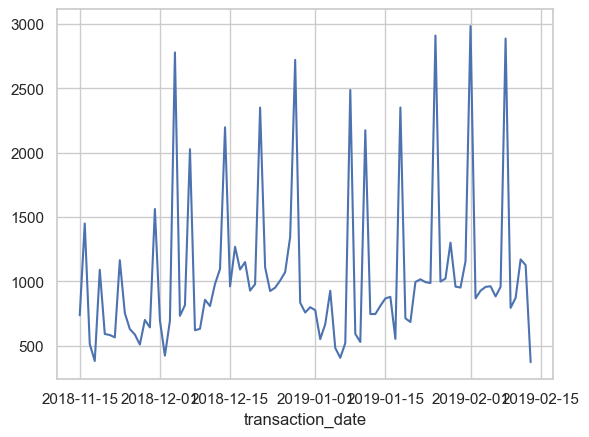

In [22]:
df['transaction_date'].dt.date.value_counts().sort_index().plot()

In [10]:
df['CustomerId'].nunique()

3742

In [11]:
customer_summary = df.groupby('CustomerId').agg({'transaction_date':['min' , 'max', 'count'], 'Amount':['sum','mean']}).reset_index()
customer_summary.head()

CustomerId          transaction_date                                  \
                                         min                       max count   
0     CustomerId_1 2018-11-21 16:49:14+00:00 2018-11-21 16:49:14+00:00     1   
1    CustomerId_10 2018-11-21 16:49:09+00:00 2018-11-21 16:49:09+00:00     1   
2  CustomerId_1001 2018-11-16 07:53:19+00:00 2018-11-16 08:20:39+00:00     5   
3  CustomerId_1002 2018-11-15 18:50:09+00:00 2019-01-18 10:05:00+00:00    11   
4  CustomerId_1003 2019-02-01 14:58:07+00:00 2019-02-01 15:04:51+00:00     6   

    Amount                
       sum          mean  
0 -10000.0 -10000.000000  
1 -10000.0 -10000.000000  
2  20000.0   4000.000000  
3   4225.0    384.090909  
4  20000.0   3333.333333

In [12]:
customer_summary.columns = ['customer_id', 'first_txn', 'last_txn', 'txn_count', 'total_amt', 'avg_amt']
customer_summary['recency_days'] = (df['transaction_date'].max() - customer_summary['last_txn']).dt.days


In [13]:
customer_summary.head()

,customer_id,first_txn,last_txn,txn_count,total_amt,avg_amt,recency_days
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,1,-10000.0,-10000.000000,83
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,1,-10000.0,-10000.000000,83
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,5,20000.0,4000.000000,89
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,11,4225.0,384.090909,25
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,6,20000.0,3333.333333,11


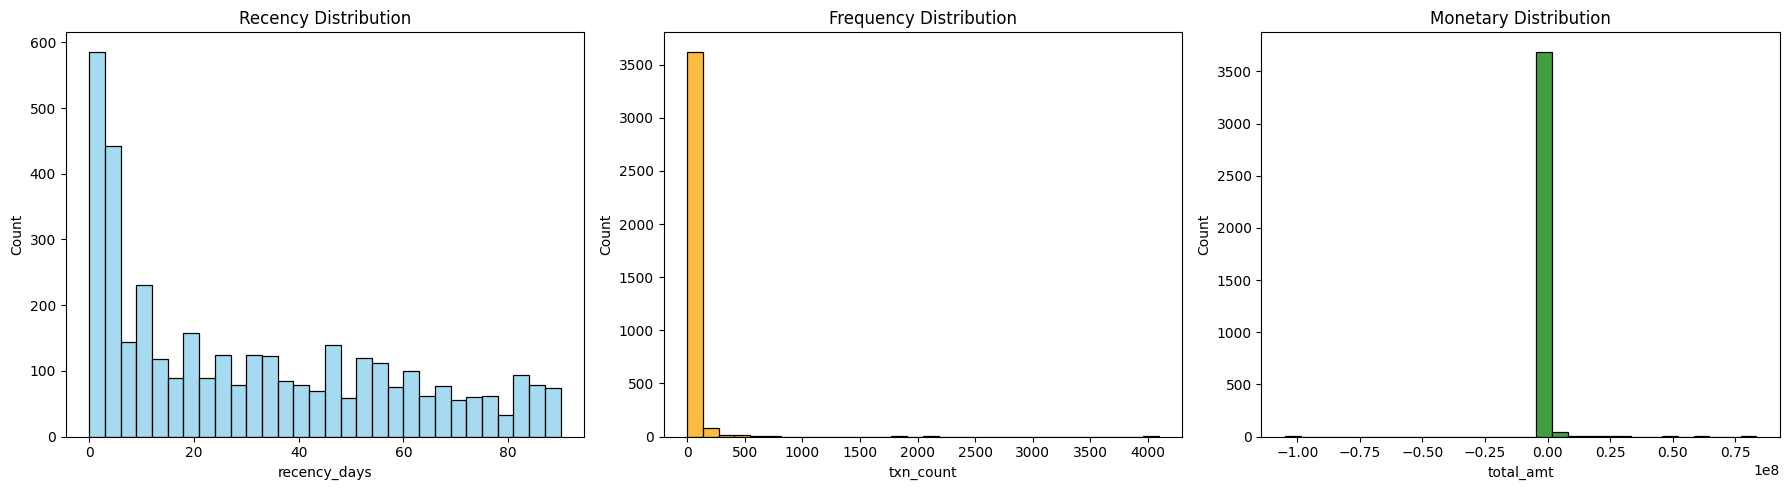

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(customer_summary['recency_days'], bins=30, ax=axs[0], color='skyblue')
axs[0].set_title("Recency Distribution")

sns.histplot(customer_summary['txn_count'], bins=30, ax=axs[1], color='orange')
axs[1].set_title("Frequency Distribution")

sns.histplot(customer_summary['total_amt'], bins=30, ax=axs[2], color='green')
axs[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()

In [41]:
customer_summary.to_csv('../data/processed/customer_rfm.csv', index=False)

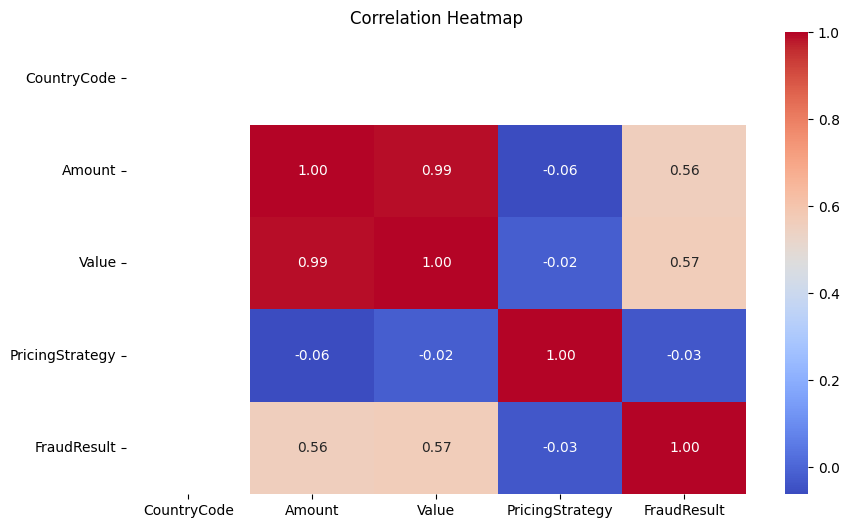

In [19]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
df.select_dtypes(include="number").corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


In [21]:
customer_summary.head()

,customer_id,first_txn,last_txn,txn_count,total_amt,avg_amt,recency_days
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,1,-10000.0,-10000.000000,83
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,1,-10000.0,-10000.000000,83
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,5,20000.0,4000.000000,89
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,11,4225.0,384.090909,25
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,6,20000.0,3333.333333,11


In [25]:
rfm = customer_summary
rfm.columns = ['customer_id','first_txn','last_txn','frequency','monetary','avg_amt','recency']
rfm.head()

,customer_id,first_txn,last_txn,frequency,monetary,avg_amt,recency
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,1,-10000.0,-10000.000000,83
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,1,-10000.0,-10000.000000,83
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,5,20000.0,4000.000000,89
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,11,4225.0,384.090909,25
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,6,20000.0,3333.333333,11


In [26]:
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Final RFM Score
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)


In [27]:
rfm.head()

,customer_id,first_txn,last_txn,frequency,monetary,avg_amt,recency,r_score,f_score,m_score,rfm_score
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,1,-10000.0,-10000.000000,83,1,1,1,111
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,1,-10000.0,-10000.000000,83,1,1,1,111
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,5,20000.0,4000.000000,89,1,2,3,123
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,11,4225.0,384.090909,25,3,4,2,342
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,6,20000.0,3333.333333,11,4,3,3,433


In [29]:
rfm['proxy_target'] = rfm['rfm_score'].apply(lambda x: 1 if int(x) >= 444 else 0)
rfm[rfm['proxy_target'] >= 1]

,customer_id,first_txn,last_txn,frequency,monetary,avg_amt,recency,r_score,f_score,m_score,rfm_score,proxy_target
12,CustomerId_1012,2018-11-16 10:42:35+00:00,2019-02-08 16:07:30+00:00,74,124906.0,1687.918919,4,5,5,5,555,1
14,CustomerId_1016,2019-02-08 18:47:23+00:00,2019-02-08 18:51:53+00:00,5,20000.0,4000.000000,4,5,2,3,523,1
19,CustomerId_1027,2019-01-21 04:19:07+00:00,2019-02-12 19:31:46+00:00,14,26770.0,1912.142857,0,5,4,3,543,1
23,CustomerId_1031,2018-12-04 07:18:10+00:00,2019-01-29 10:15:40+00:00,50,106838.8,2136.776000,14,4,5,5,455,1
26,CustomerId_1034,2018-11-23 06:54:00+00:00,2019-02-04 13:11:25+00:00,16,40508.0,2531.750000,8,4,4,4,444,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3729,CustomerId_979,2018-12-21 13:20:03+00:00,2019-02-01 12:55:59+00:00,17,80000.0,4705.882353,11,4,4,4,444,1
3733,CustomerId_988,2018-11-15 03:32:55+00:00,2019-02-08 07:53:33+00:00,38,228727.2,6019.136842,5,4,5,5,455,1
3737,CustomerId_992,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,6,20000.0,3333.333333,4,5,3,3,533,1
3739,CustomerId_994,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,101,543873.0,5384.881188,0,5,5,5,555,1


In [30]:
rfm.to_csv("../data/processed/rfm_with_proxy_target.csv", index=False)

In [47]:
rfm['first_txn'] = pd.to_datetime(rfm['first_txn'])
rfm['last_txn'] = pd.to_datetime(rfm['last_txn'])

rfm['first_txn_year'] = rfm['first_txn'].dt.year
rfm['first_txn_month'] = rfm['first_txn'].dt.month
rfm['first_txn_day'] = rfm['first_txn'].dt.day

rfm['last_txn_year'] = rfm['last_txn'].dt.year
rfm['last_txn_month'] = rfm['last_txn'].dt.month
rfm['last_txn_day'] = rfm['last_txn'].dt.day
rfm = rfm.drop(columns=['first_txn','last_txn'])
rfm.head()


,customer_id,frequency,monetary,avg_amt,recency,r_score,f_score,m_score,rfm_score,proxy_target,first_txn_year,first_txn_month,first_txn_day,last_txn_year,last_txn_month,last_txn_day
0,CustomerId_1,1,-10000.0,-10000.000000,83,1,1,1,111,0,2018,11,21,2018,11,21
1,CustomerId_10,1,-10000.0,-10000.000000,83,1,1,1,111,0,2018,11,21,2018,11,21
2,CustomerId_1001,5,20000.0,4000.000000,89,1,2,3,123,0,2018,11,16,2018,11,16
3,CustomerId_1002,11,4225.0,384.090909,25,3,4,2,342,0,2018,11,15,2019,1,18
4,CustomerId_1003,6,20000.0,3333.333333,11,4,3,3,433,0,2019,2,1,2019,2,1


In [48]:
X = rfm.drop(columns=['customer_id','proxy_target'])
Y = rfm['proxy_target']

In [49]:
X.head()


,frequency,monetary,avg_amt,recency,r_score,f_score,m_score,rfm_score,first_txn_year,first_txn_month,first_txn_day,last_txn_year,last_txn_month,last_txn_day
0,1,-10000.0,-10000.000000,83,1,1,1,111,2018,11,21,2018,11,21
1,1,-10000.0,-10000.000000,83,1,1,1,111,2018,11,21,2018,11,21
2,5,20000.0,4000.000000,89,1,2,3,123,2018,11,16,2018,11,16
3,11,4225.0,384.090909,25,3,4,2,342,2018,11,15,2019,1,18
4,6,20000.0,3333.333333,11,4,3,3,433,2019,2,1,2019,2,1


In [51]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: proxy_target, dtype: int64

In [52]:
print(X.dtypes)


frequency            int64
monetary           float64
avg_amt            float64
recency              int64
r_score              int64
f_score              int64
m_score              int64
rfm_score           object
first_txn_year       int32
first_txn_month      int32
first_txn_day        int32
last_txn_year        int32
last_txn_month       int32
last_txn_day         int32
dtype: object


In [53]:
X['rfm_score'] = X['rfm_score'].astype(int)


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
y_pred = clf.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print("ROC AUC:", roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))

[[519   0]
 [  0 230]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       519
           1       1.00      1.00      1.00       230

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749

ROC AUC: 1.0


In [60]:
import joblib 

In [61]:
joblib.dump(clf, '../models/rfm_credit_classifier.pkl')


['../models/rfm_credit_classifier.pkl']

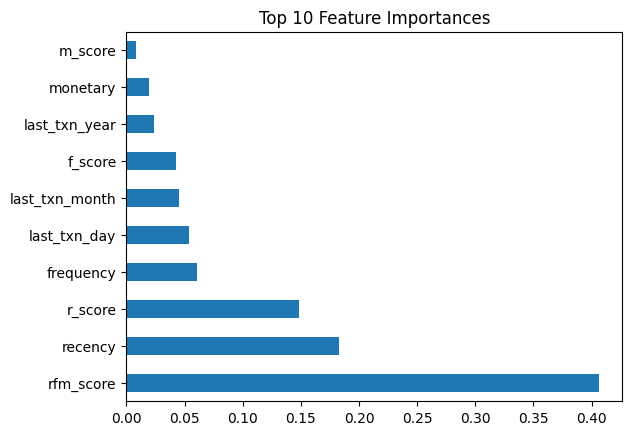

In [62]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()